In [1]:
# Titanic dataset 로딩
import pandas as pd

titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Histogram
- 연속값에 대한 구간별 도수 분포 시각화

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

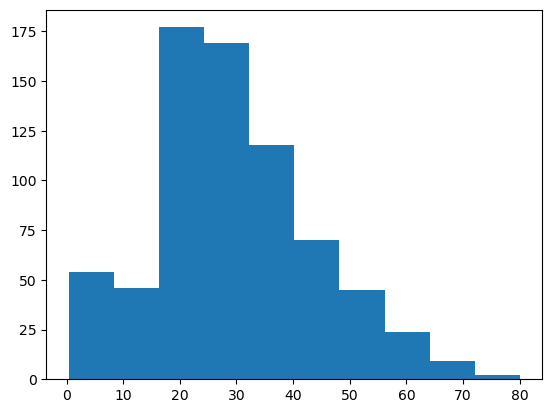

In [3]:
import matplotlib.pyplot as plt

# 1. matplotlib으로 그리기
plt.hist(titanic_df["Age"])
# plt.show()

<Axes: >

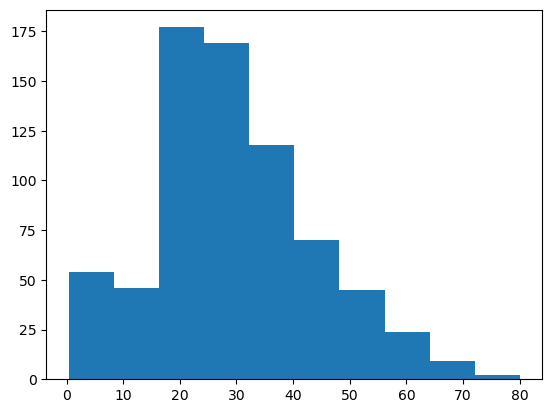

In [5]:
# 2. Pandas에서 hist함수 바로 호출하기
titanic_df["Age"].hist(grid=False)

### Seaborn histogram으로 그리기
- seaborn의 distplot이 히스토그램을 그리기 위한 함수였으나 deprecated
- 새롭게 도입된 histplot(axes레벨), displot(figure레벨)이 대신 사용됨

/var/folders/sp/nyq1jm756zx6rn4ftpkg3lww0000gn/T/ipykernel_51102/3099359334.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_df["Age"], bins=10)


<Axes: xlabel='Age', ylabel='Density'>

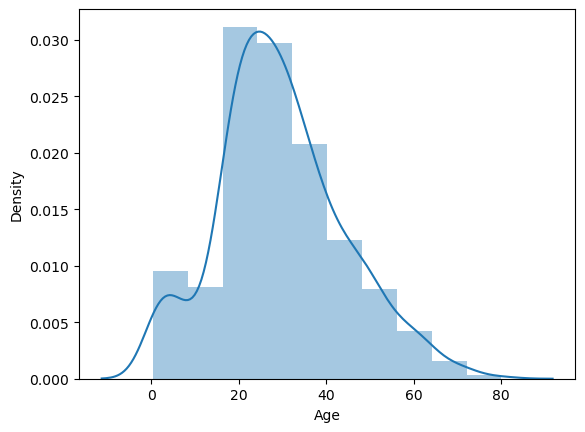

In [8]:
import seaborn as sns

sns.distplot(titanic_df["Age"], bins=10)

<Axes: xlabel='Age', ylabel='Count'>

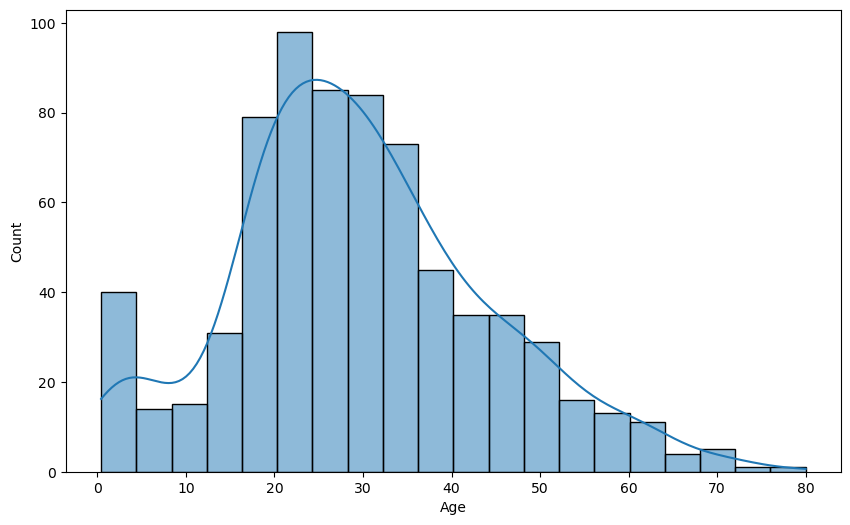

In [12]:
# 1) histplot (axes 레벨)
import seaborn as sns

# seaborn에서도 figure로 캔버스의 사이즈를 조정한다
plt.figure(figsize=(10, 6))

# pandas dataframe의 컬럼명을 자동으로 인식해서 xlabel을 할당한 것을 확인할 수 있다
# ylabel 값은 히스토그램일때 count로 할당된다
sns.histplot(titanic_df["Age"], kde=True)

/Users/jman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


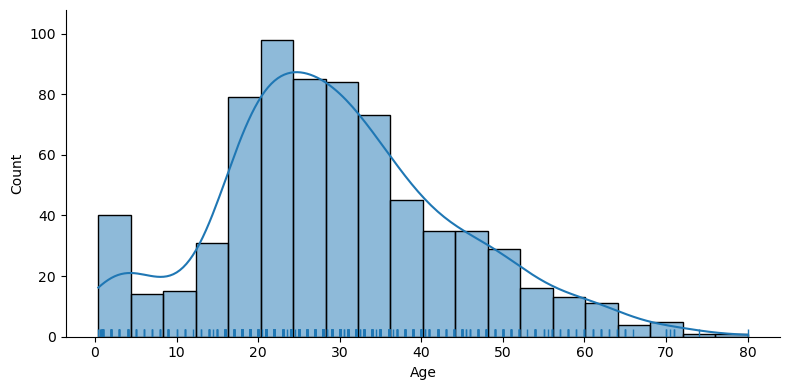

In [19]:
# 2) displot (figure 레벨)
import seaborn as sns

# seaborn의 figure레벨 그래프는 plt.figure로 figsize를 조정할 수 없음 (height, aspect 인자로 자체조정)
# 동일하게 데이터프레임의 컬럼명을 자동으로 인식해서 xlabel 할당
sns.displot(titanic_df["Age"], kde=True, rug=True, height=4, aspect=2)

/Users/jman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

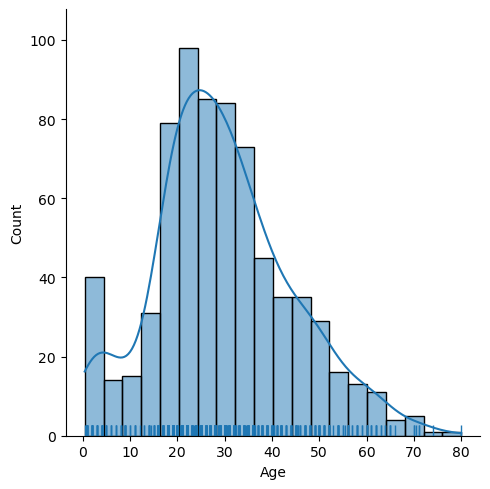

In [26]:
# plt.figure로 사이즈를 조정해도 반영되지 않음을 확인할 수 있다
plt.figure(figsize=(10, 6))
sns.displot(titanic_df["Age"], kde=True, rug=True)

### Countplot
- 카테고리 값에 대한 건수를 표현한다
- x축이 카테고리 값, y축이 해당 카테고리 값에 대한 건수 (바 그래프와 동일)

<Axes: xlabel='Pclass', ylabel='count'>

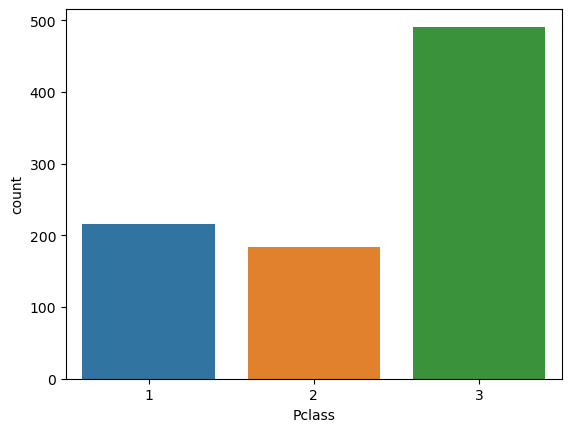

In [27]:
sns.countplot(x="Pclass", data=titanic_df)

### barplot
- 주로 seaborn barplot은 x축은 이산값, y축은 연속값을 표현한다

<Axes: xlabel='Pclass', ylabel='Age'>

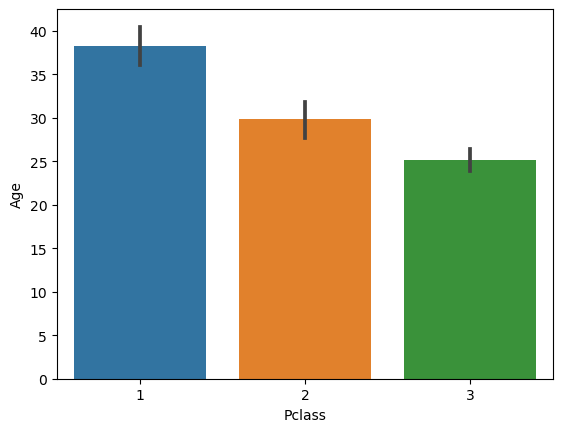

In [31]:
# xlabel과 ylabel을 각각 자동으로 x, y 입력값으로 설정해준다
sns.barplot(x="Pclass", y="Age", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

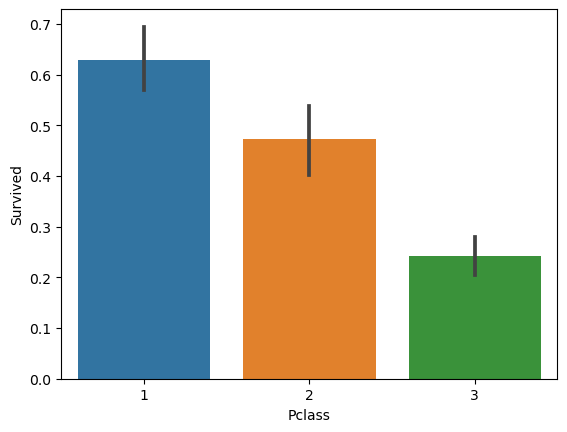

In [34]:
sns.barplot(x="Pclass", y="Survived", data=titanic_df)

<Axes: xlabel='Survived', ylabel='Sex'>

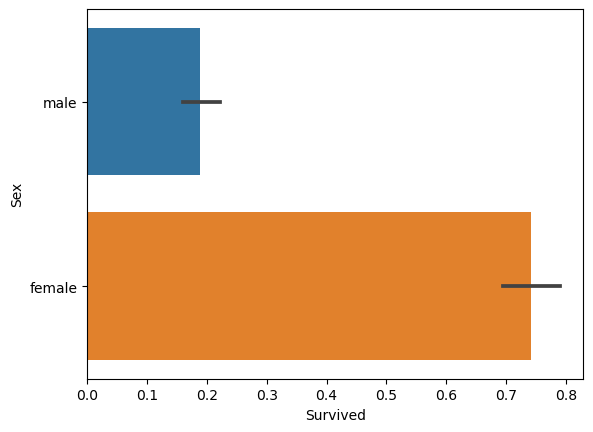

In [37]:
## 수직 barplot에 y축 값을 문자값으로 설정하면 자동으로 수평 barplot으로 변환
sns.barplot(x="Survived", y="Sex", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

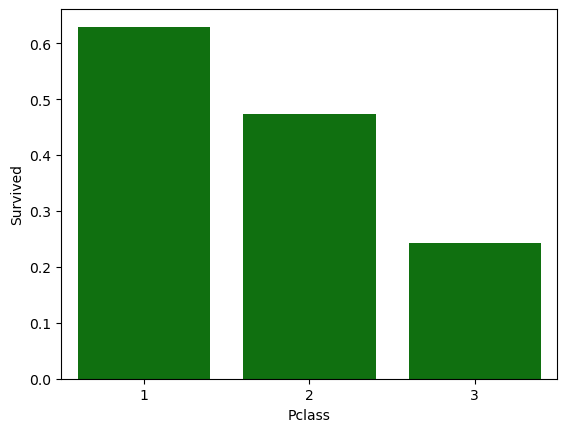

In [43]:
# confidence interval을 없애고 color를 추가해본다
# ci 인자가 depricated되었고 errorbar=None으로 사용한다
sns.barplot(x="Pclass", y="Survived", data=titanic_df, color="green", errorbar=None)

<Axes: xlabel='Pclass', ylabel='Survived'>

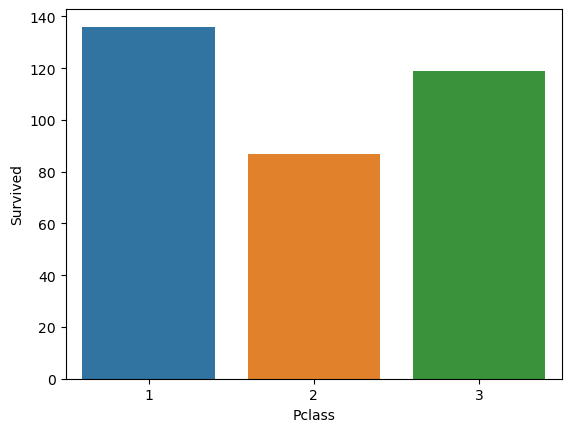

In [46]:
# estimator인자로 디폴트인 평균 대신 합계도 구할 수 있다
sns.barplot(x="Pclass", y="Survived", data=titanic_df, estimator="sum", errorbar=None)

<Axes: xlabel='Pclass', ylabel='Age'>

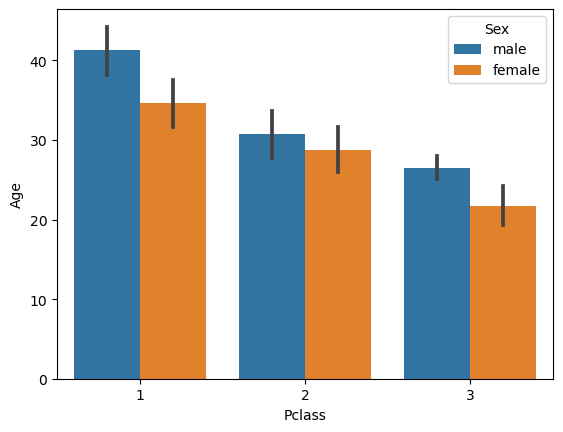

In [50]:
# Pclass가 x축 값이며, hue를 Sex로 설정해서 한번 더 breakdown시킴
sns.barplot(x="Pclass", y="Age", hue="Sex", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

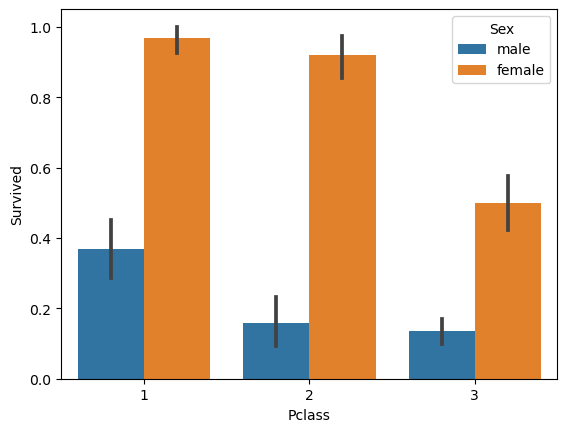

In [51]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

In [52]:
# 나이에 따라 카테고리를 나눠서 분석
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x: get_category(x))    

<Axes: xlabel='Age_cat', ylabel='Survived'>

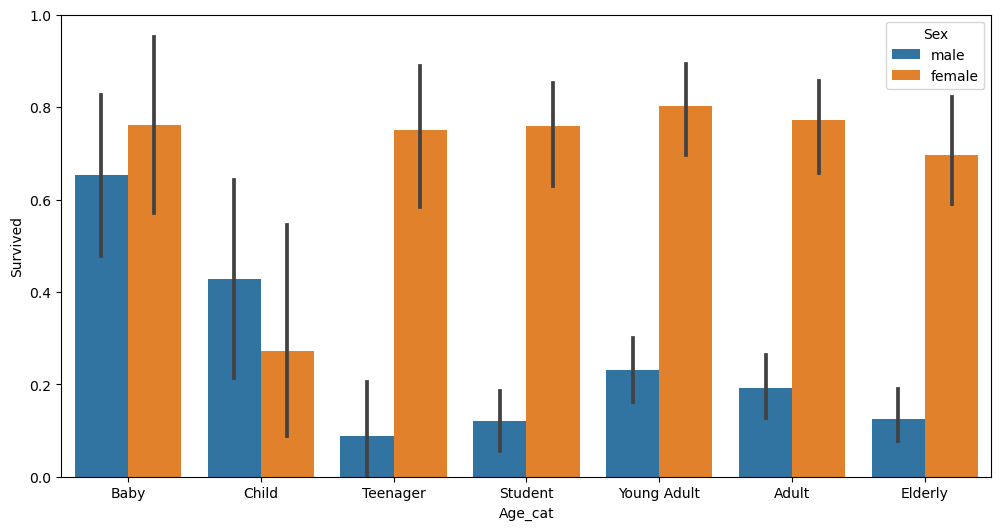

In [57]:
plt.figure(figsize=(12, 6))
order_columns = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
# order 인자를 전달해서 정렬을 할 수 있다
sns.barplot(x="Age_cat", y="Survived", hue="Sex", data=titanic_df, order=order_columns)

<Axes: xlabel='Sex', ylabel='Survived'>

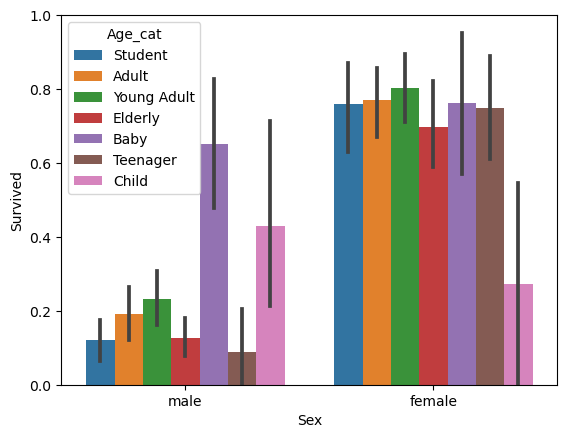

In [63]:
sns.barplot(x="Sex", y="Survived", hue="Age_cat", data=titanic_df)

<Axes: xlabel='Survived', ylabel='Pclass'>

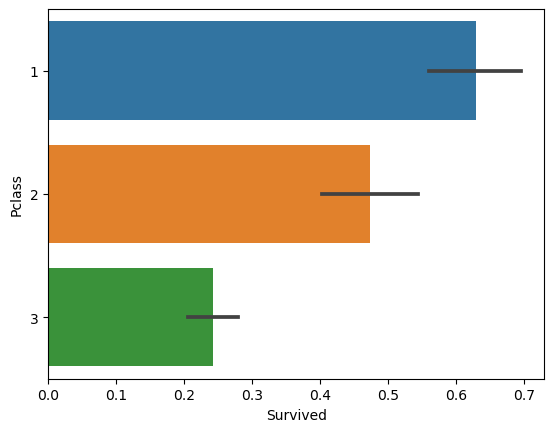

In [67]:
# orient를 h로 설정하면 수평 바 플롯을 그리는데 이때 y축을 이산형 값으로 설정해줘야한다
sns.barplot(x="Survived", y="Pclass", data=titanic_df, orient="h")

### Violin plot
- 단일 컬럼에 대해서는 히스토그램과 유사하게 연속값의 분포도를 시각화한다
- 중심에는 4분위수를 파악할 수 있도록 박스플롯의 박스가 들어있다
- **주로 X축에 두는 컬럼의 이산값별로 Y축 분포도를 시각화하는데 활용한다**

<Axes: ylabel='Age'>

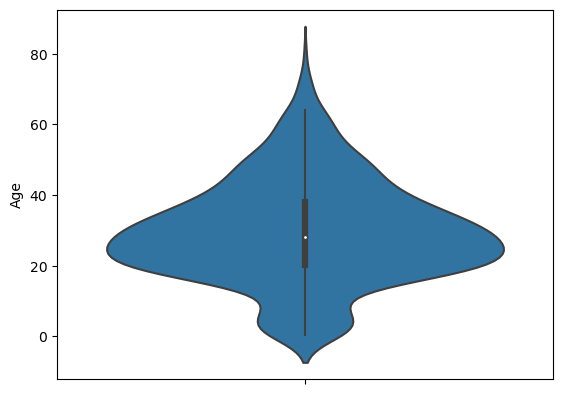

In [69]:
# Age 컬럼에 대한 연속확률분포를 시각화
sns.violinplot(y="Age", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Age'>

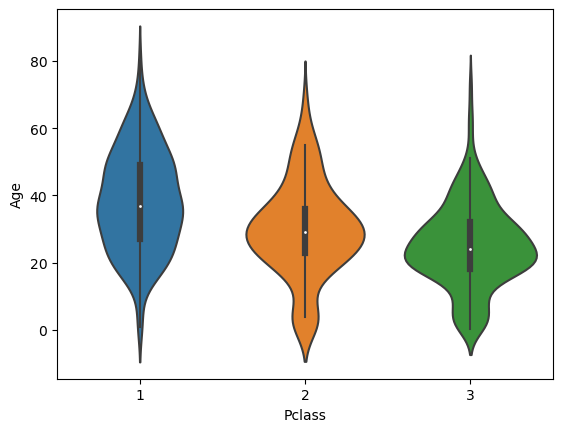

In [71]:
# x축 값인 Pclass의 값에 따른 Age의 연속분포 곡선을 파악할 수 있다
sns.violinplot(x="Pclass", y="Age", data=titanic_df)

<Axes: xlabel='Sex', ylabel='Age'>

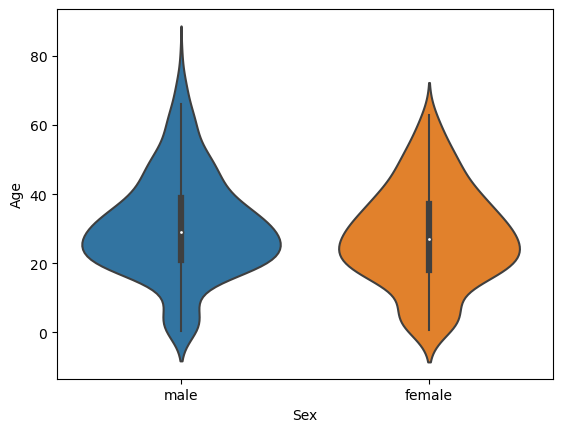

In [72]:
sns.violinplot(x="Sex", y="Age", data=titanic_df)

### subplots 활용

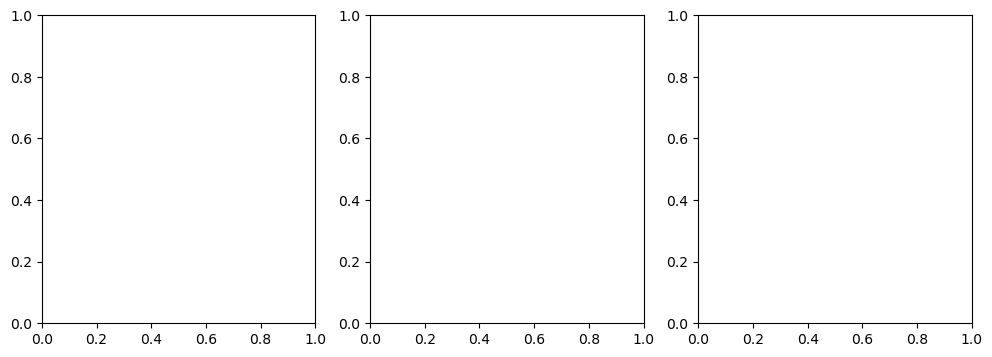

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

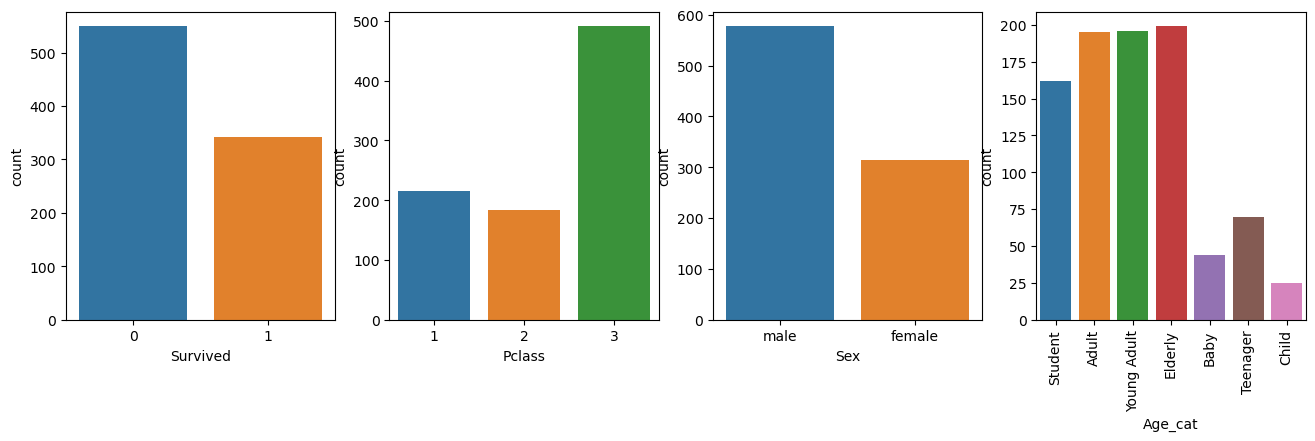

In [80]:
# subplots를 이용해서 주요 카테고리성 컬럼의 건수 시각화
cat_columns = ["Survived", "Pclass", "Sex", "Age_cat"]

# nrows는 1이고 ncols는 컬럼의 개수만큼인 subplots를 설정
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(16, 4))

for index, column in enumerate(cat_columns):
    # seaborn의 ax인자로 subplots의 어느 axes에 위치할 것인지 설정한다
    sns.countplot(x=column, data=titanic_df, ax=axs[index])
    if index == 3:
        # plt.xticks(rotation=90)으로 간단하게 할 수 있는 반면, Axes 객체를 직접 이용하면 복잡하다
        axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=90)

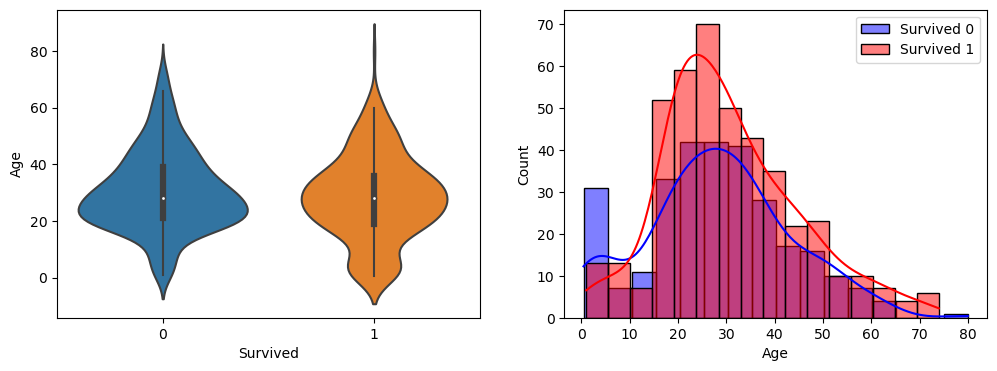

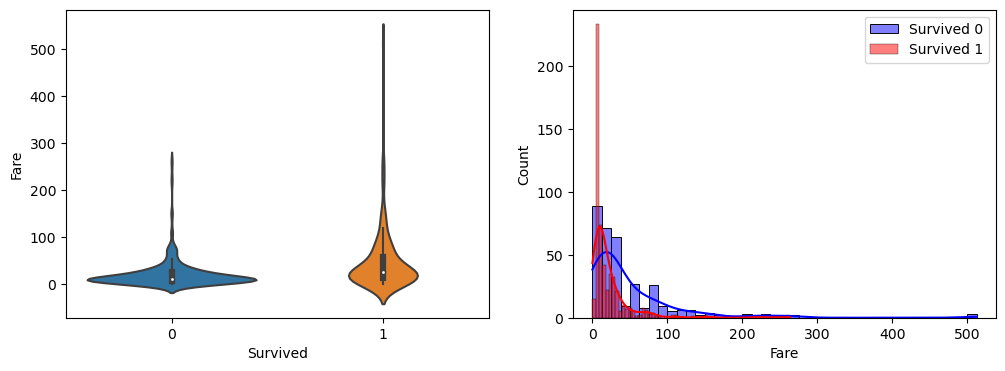

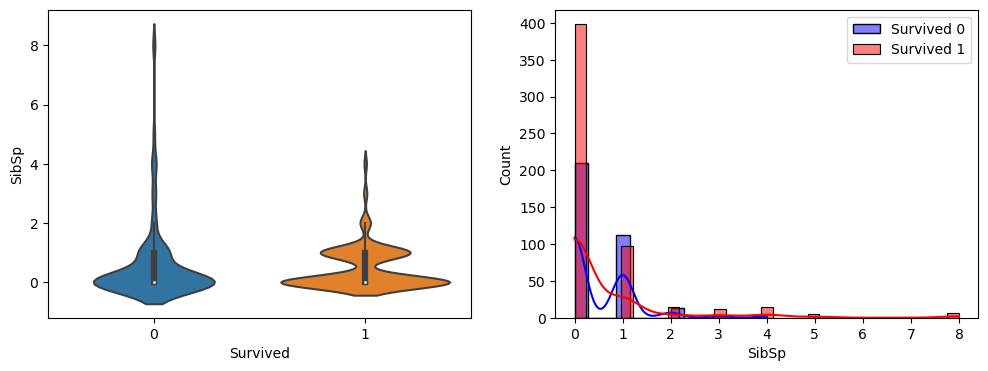

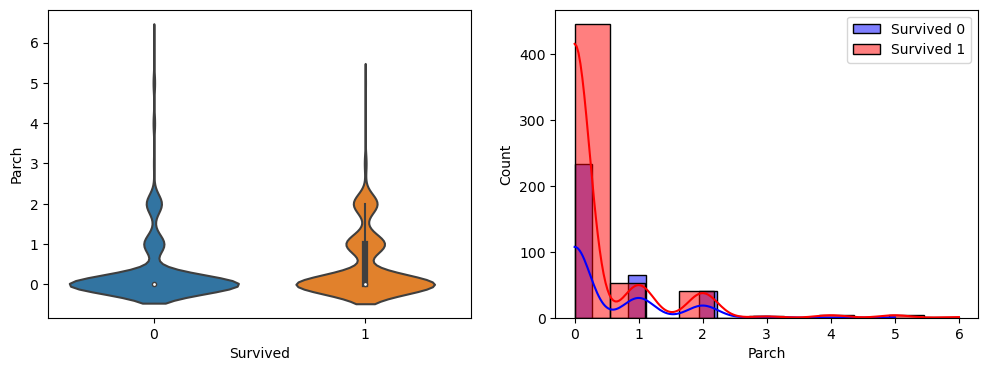

In [82]:
# subplots를 이용해서 주요 카테고리성 컬럼에 따른 생존율 시각화
def show_hist_by_target(df, columns):
    cond_0 = (df["Survived"] == 1)
    cond_1 = (df["Survived"] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        sns.violinplot(x="Survived", y=column, data=df, ax=axs[0])
        sns.histplot(df[cond_0][column], ax=axs[1], kde=True, label="Survived 0", color="blue")
        sns.histplot(df[cond_1][column], ax=axs[1], kde=True, label="Survived 1", color="red")
        axs[1].legend()
        
cont_columns = ["Age", "Fare", "SibSp", "Parch"]
show_hist_by_target(titanic_df, cont_columns)

### box plot
- 4분위를 박스 형태로 표현

<Axes: ylabel='Age'>

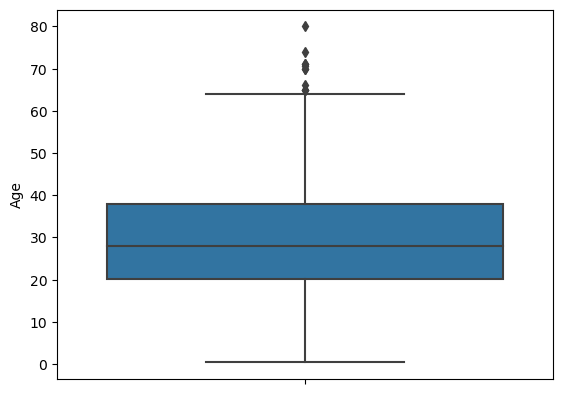

In [83]:
sns.boxplot(y="Age", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Age'>

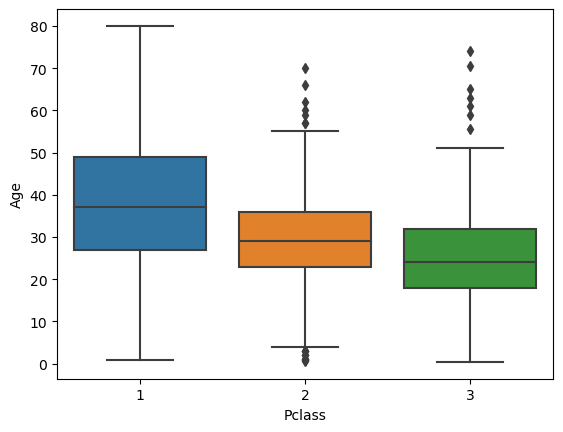

In [84]:
sns.boxplot(x="Pclass", y="Age", data=titanic_df)

### scatter plot
- 산포도로 x축과 y축에 보통 연속형 값을 시각화한다
- hue, style 등으로 정보를 breakdown 할 수 있다

<Axes: xlabel='Age', ylabel='Fare'>

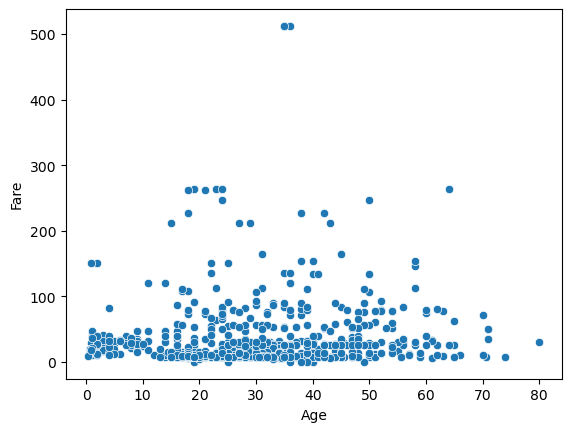

In [85]:
sns.scatterplot(x="Age", y="Fare", data=titanic_df)

<Axes: xlabel='Age', ylabel='Fare'>

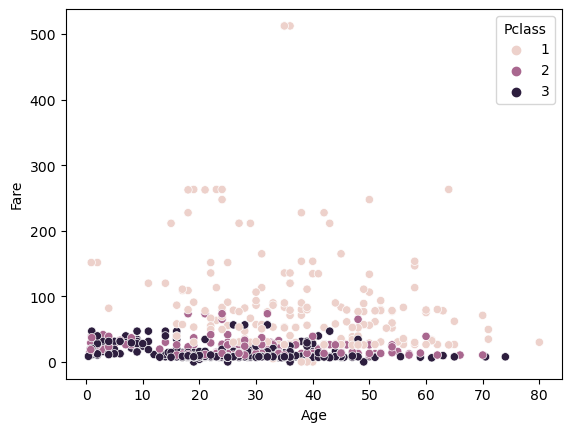

In [86]:
sns.scatterplot(x="Age", y="Fare", hue="Pclass", data=titanic_df)

### 상관 heatmap
- 컬럼간의 상관도를 heatmap 형태로 표현

In [90]:
# pandas 2.0 이상 버전부터는 numeric_only 인자를 True로 전달해야 오류안남(문자열 등)
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

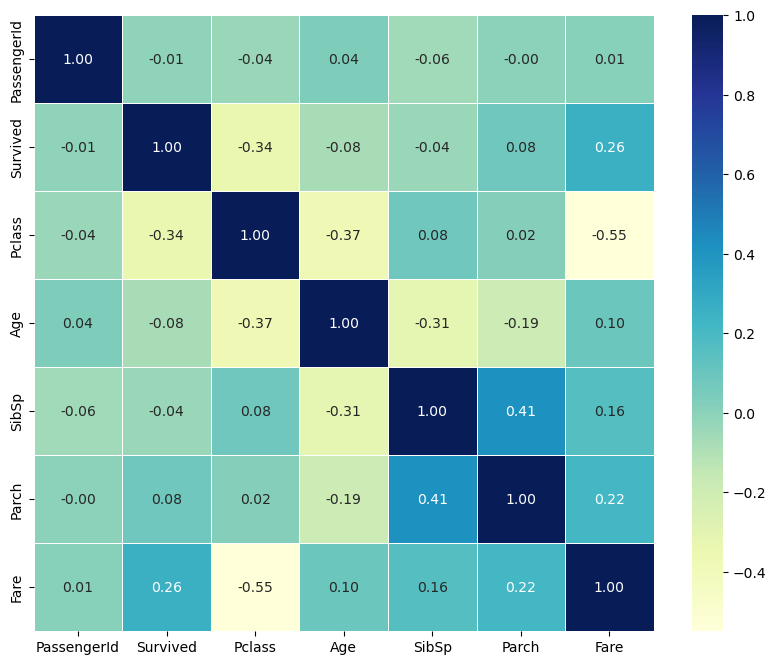

In [99]:
plt.figure(figsize=(10, 8))

corr = titanic_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, cmap="YlGnBu")